## Python statistics essential training - 05_06_bayesian

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)
    
    y = pm.Binomial('y',n=n,p=p,observed=k)
    
    trace = pm.sample(10000)

<ipython-input-6-47cdf87190ca>:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 40 seconds.
The acceptance probability does not match the target. It is 0.8791365890902282, but should be close to 0.8. Try to increase the number of tuning steps.


In [7]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\derek\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.515,0.696,0.0,0.0,16122.0,23565.0,1.0


<ipython-input-8-4b673fced3da>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\derek\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

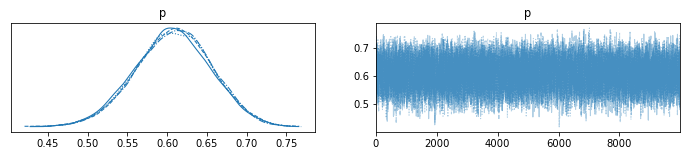

In [8]:
pm.traceplot(trace)

In [9]:
gdata=pd.read_csv('gapminder.csv').query('year == 1985')

In [10]:
gdata.sort_values('age5_surviving',inplace=True)

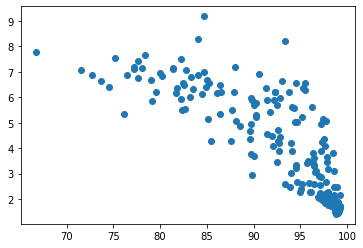

In [11]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

In [ ]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal('babies',
                       mu = intercept + slope * (gdata['age5_surviving'] - 65),
                       sd = 1,
                       observed = gdata['babies_per_woman'])
    
    trace = pm.sample(10000)

<ipython-input-12-4a66051851e1>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\derek\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]


In [ ]:
pm.summary(trace)

In [ ]:
pm.traceplot(trace)

In [ ]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

In [ ]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'],babies,'C1')

In [ ]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)